In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
import pandas as pd

In [65]:
def pca_analysis(x, n_components):
    pca = PCA(n_components = n_components)
    x_pca = pca.fit_transform(x)
    return pca, x_pca

In [ ]:
def optimal_num_of_components(pca):
    explained_var = pca.explained_variance_ratio_
    cum_explained_var = explained_var.cumsum()
    n_components_90 = np.argmax(cum_explained_var >= 0.90) + 1
    print("Optimal number of components for (>=90% variance):", n_components_90)


<Figure size 800x600 with 0 Axes>

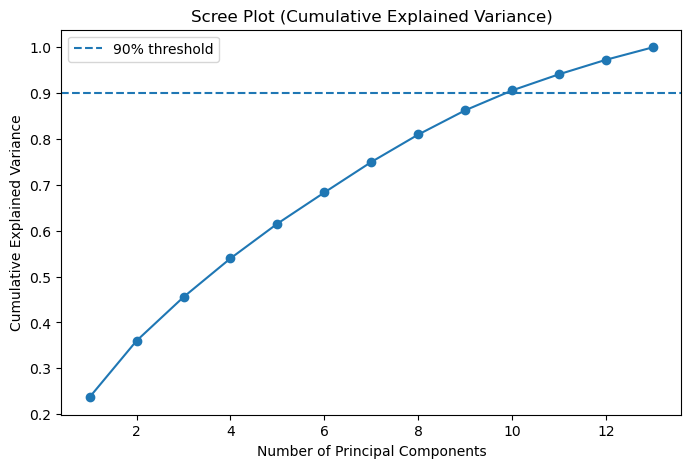

In [67]:
def pca_visualization(X_scaled, y, mode):
    plt.figure(figsize=(8, 6))
    if mode == "scatter":
        pca, x_pca = pca_analysis(X_scaled, n_components=2)
        plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y.values.ravel(), cmap = 'viridis')
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("PCA (2 components)")
        plt.colorbar(label = 'Species')
        plt.show()
    
    elif mode == "cumulative variance":
        pca, _ = pca_analysis(X_scaled, n_components=None)
        cum = np.cumsum(pca.explained_variance_ratio_)
        plt.figure(figsize=(8, 5))
        plt.plot(np.arange(1, len(cum)+1), cum, marker='o')
        plt.axhline(0.90, ls='--', label='90% threshold')
        plt.xlabel("Number of Principal Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.title("Scree Plot (Cumulative Explained Variance)")
        plt.legend()
        plt.show()


    else:
        raise ValueError("mode must be 'scatter' or 'cumulative variance'")

pca_visualization(X_scaled, y, "cumulative variance")
